In [1]:
import numpy

from matplotlib import pyplot

import custom_environments

In [2]:
e = custom_environments.VectorDiscreteSteps(num_envs=3, render_mode="rgb_array")

In [3]:
e.action_space

MultiDiscrete([11 11 11])

In [4]:
e.single_action_space

Discrete(11)

In [5]:
e.reset()

(array([[ 0.05038967,  0.45333058],
        [ 0.5619572 ,  0.7931007 ],
        [-0.95936334, -0.14318615]], dtype=float32),
 {})

In [6]:
def show(image):
    _, ax = pyplot.subplots(figsize=(14, 14))
    ax.axis("off")
    ax.imshow(image)
    pyplot.tight_layout()

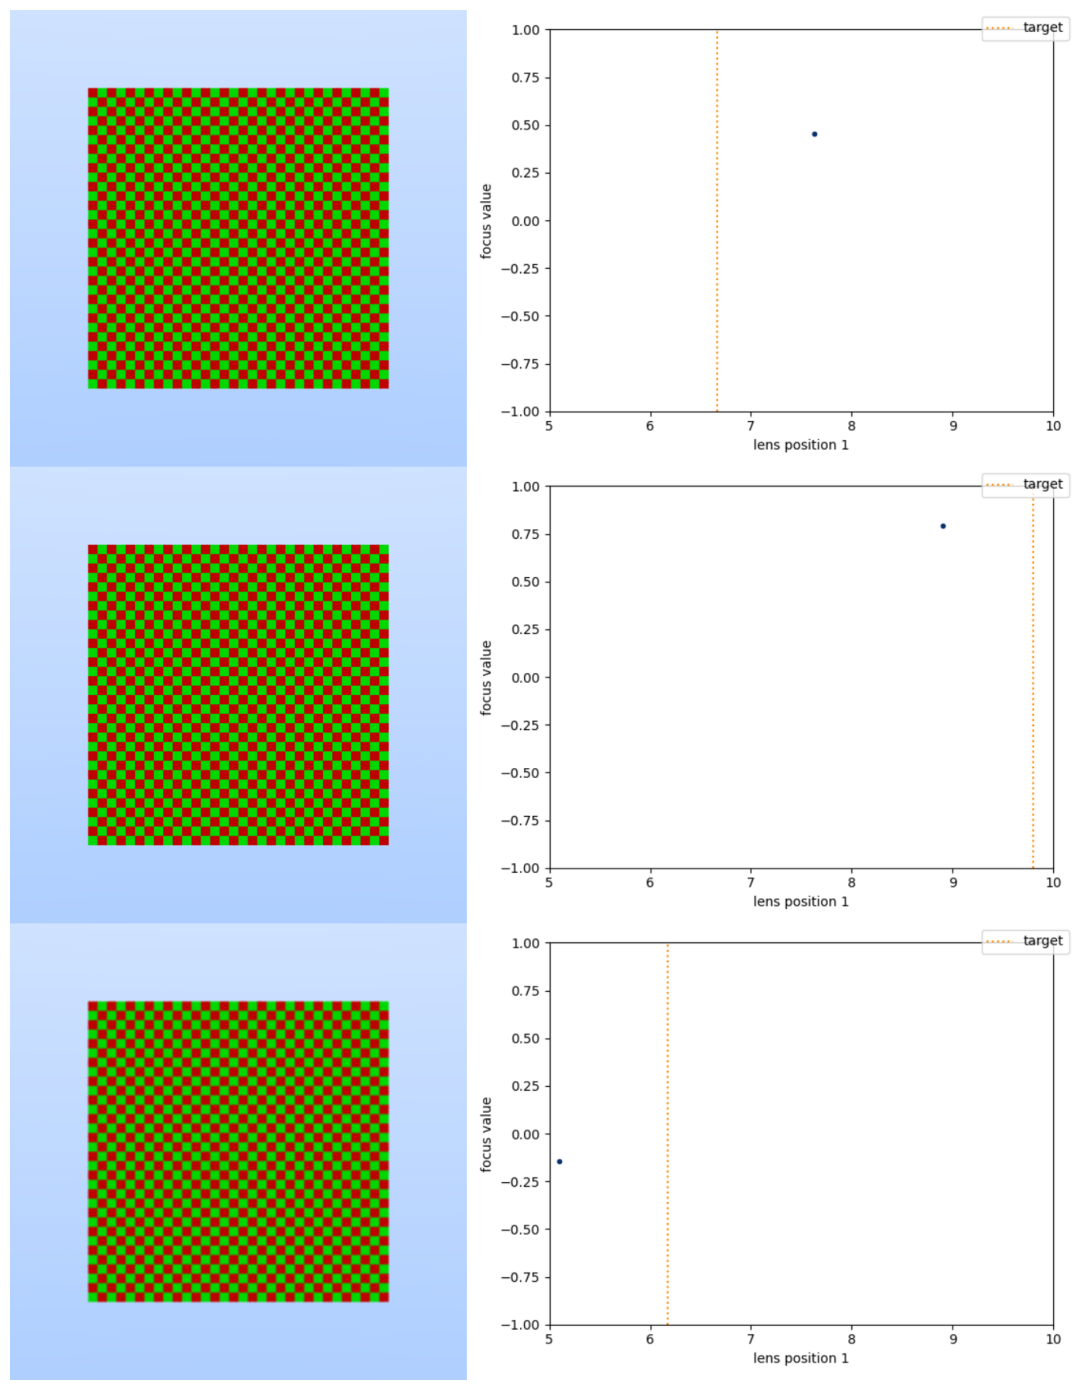

In [7]:
show(e.render())

In [8]:
action = e.action_space.sample()
print(action)

[3 6 7]


In [9]:
e.step(action)

(array([[-0.02961025,  0.6026258 ],
        [ 0.6019573 ,  0.83061385],
        [-0.8793634 ,  0.1281369 ]], dtype=float32),
 array([0.6026258 , 0.83061385, 0.1281369 ], dtype=float32),
 array([False, False, False]),
 array([False, False, False]),
 {})

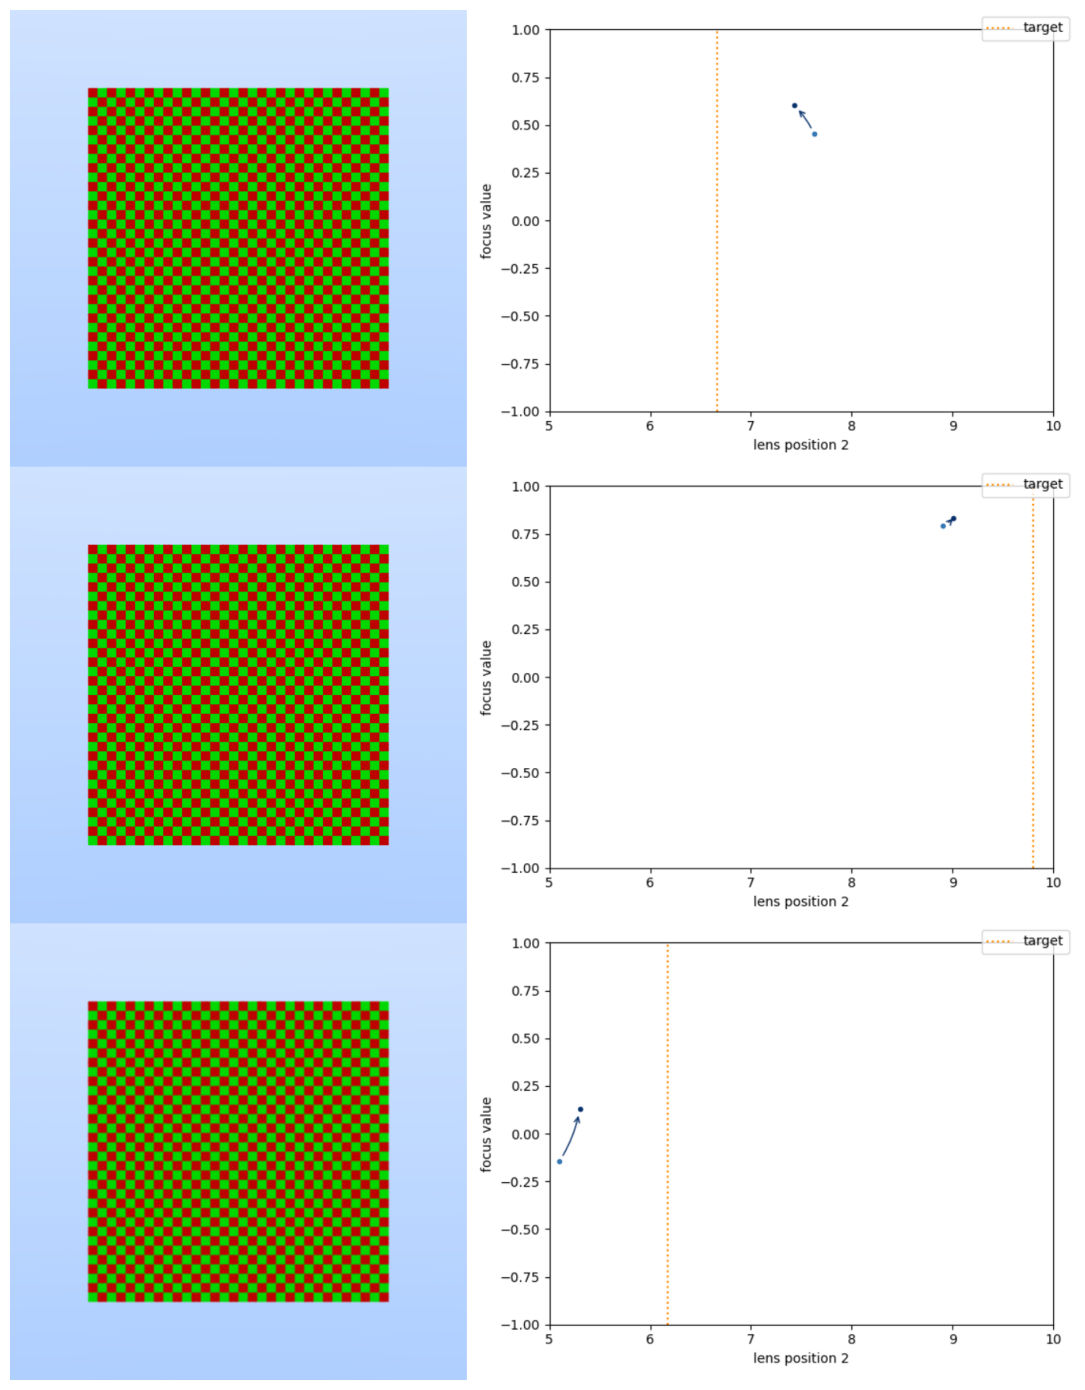

In [10]:
show(e.render())

In [11]:
e._state

array([[6.661276 , 7.4259744],
       [9.80388  , 9.004893 ],
       [6.1720853, 5.3015914]], dtype=float32)

In [12]:
def cross_target(left, stop, right):
    assert e._state is not None

    high_start = e._state[:, 1] > e._state[:, 0]

    keep_moving = numpy.full(high_start.shape, True)

    while any(keep_moving):
        actions = numpy.full(high_start.shape, right)
        actions[high_start] = left
        actions[numpy.logical_not(keep_moving)] = stop

        e.step(actions)
        show(e.render())

        keep_moving = high_start == (e._state[:, 1] > e._state[:, 0])

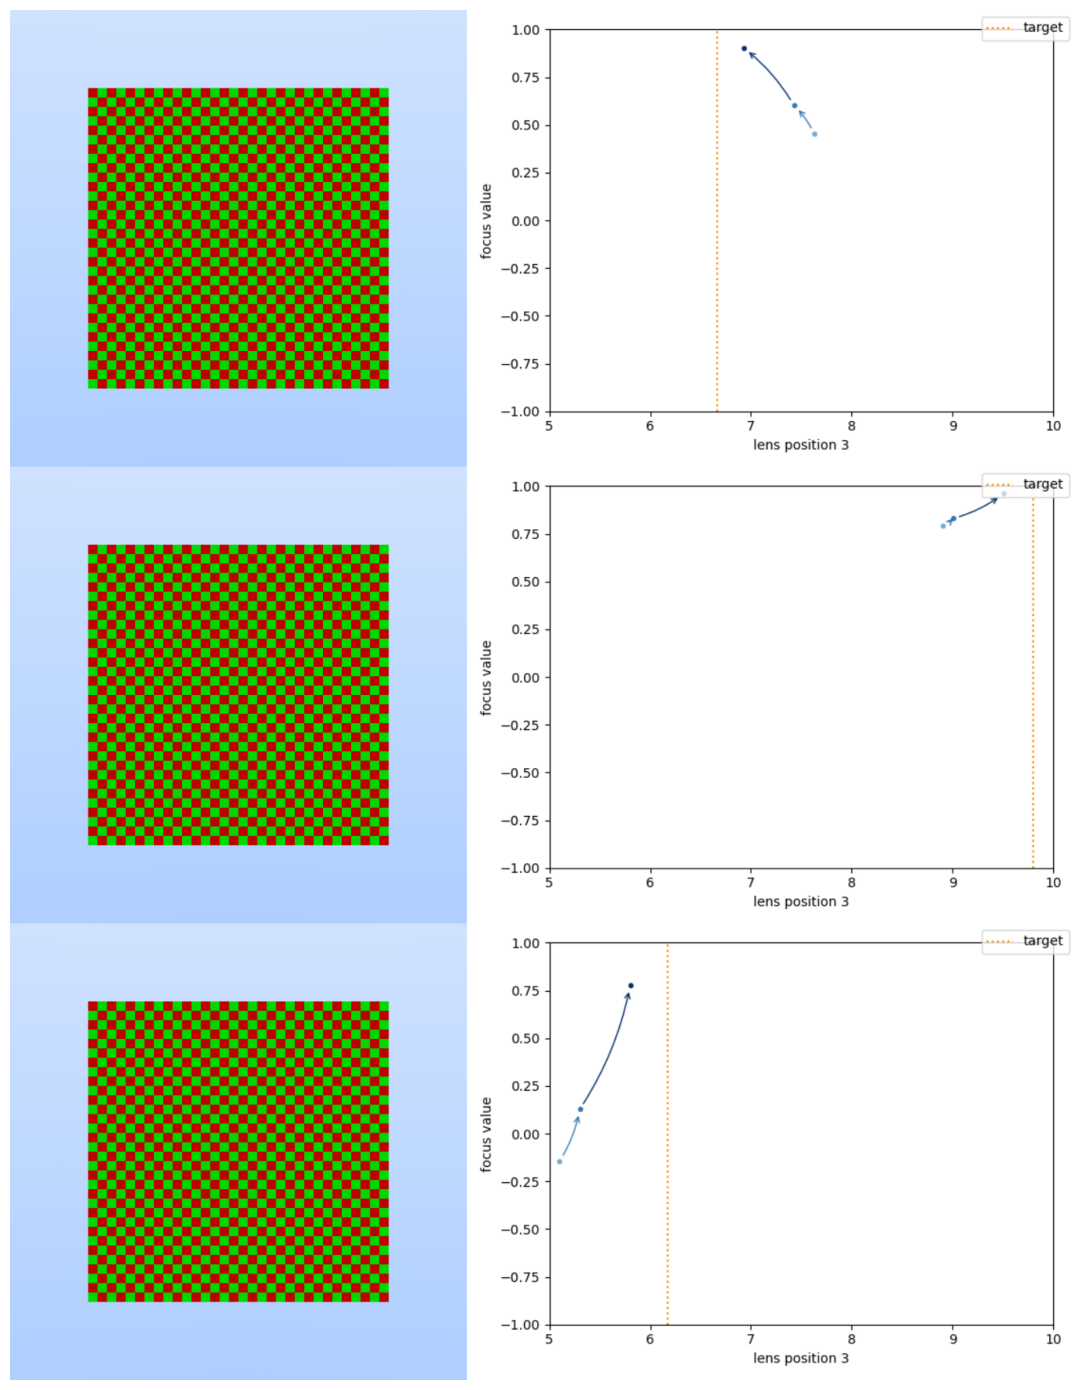

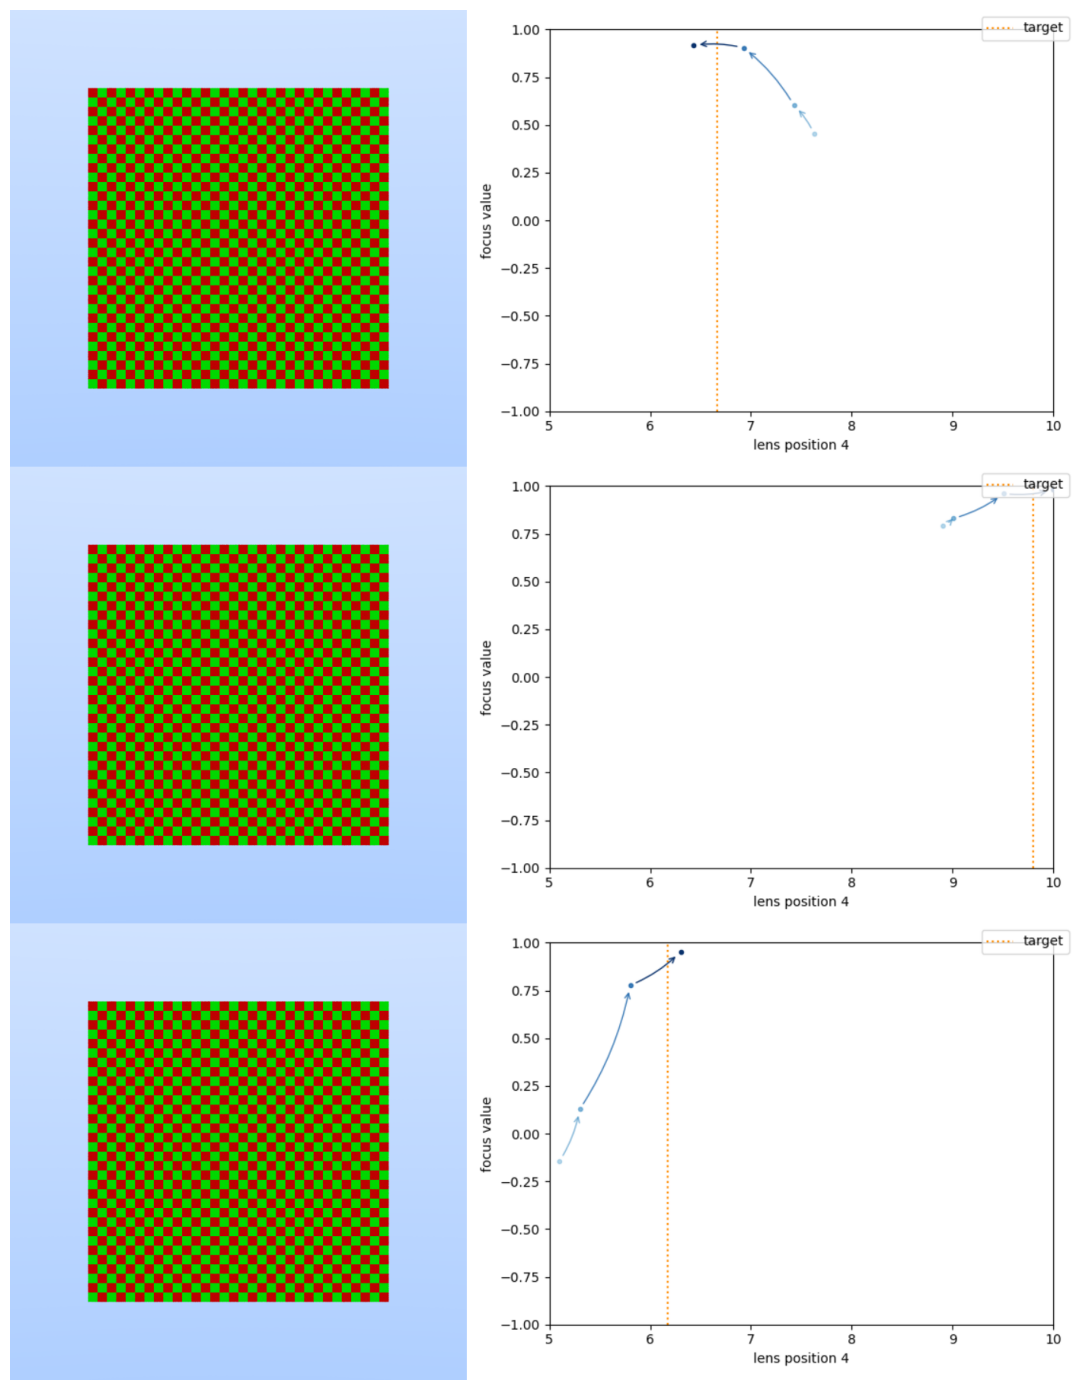

In [13]:
cross_target(0, 5, 10)

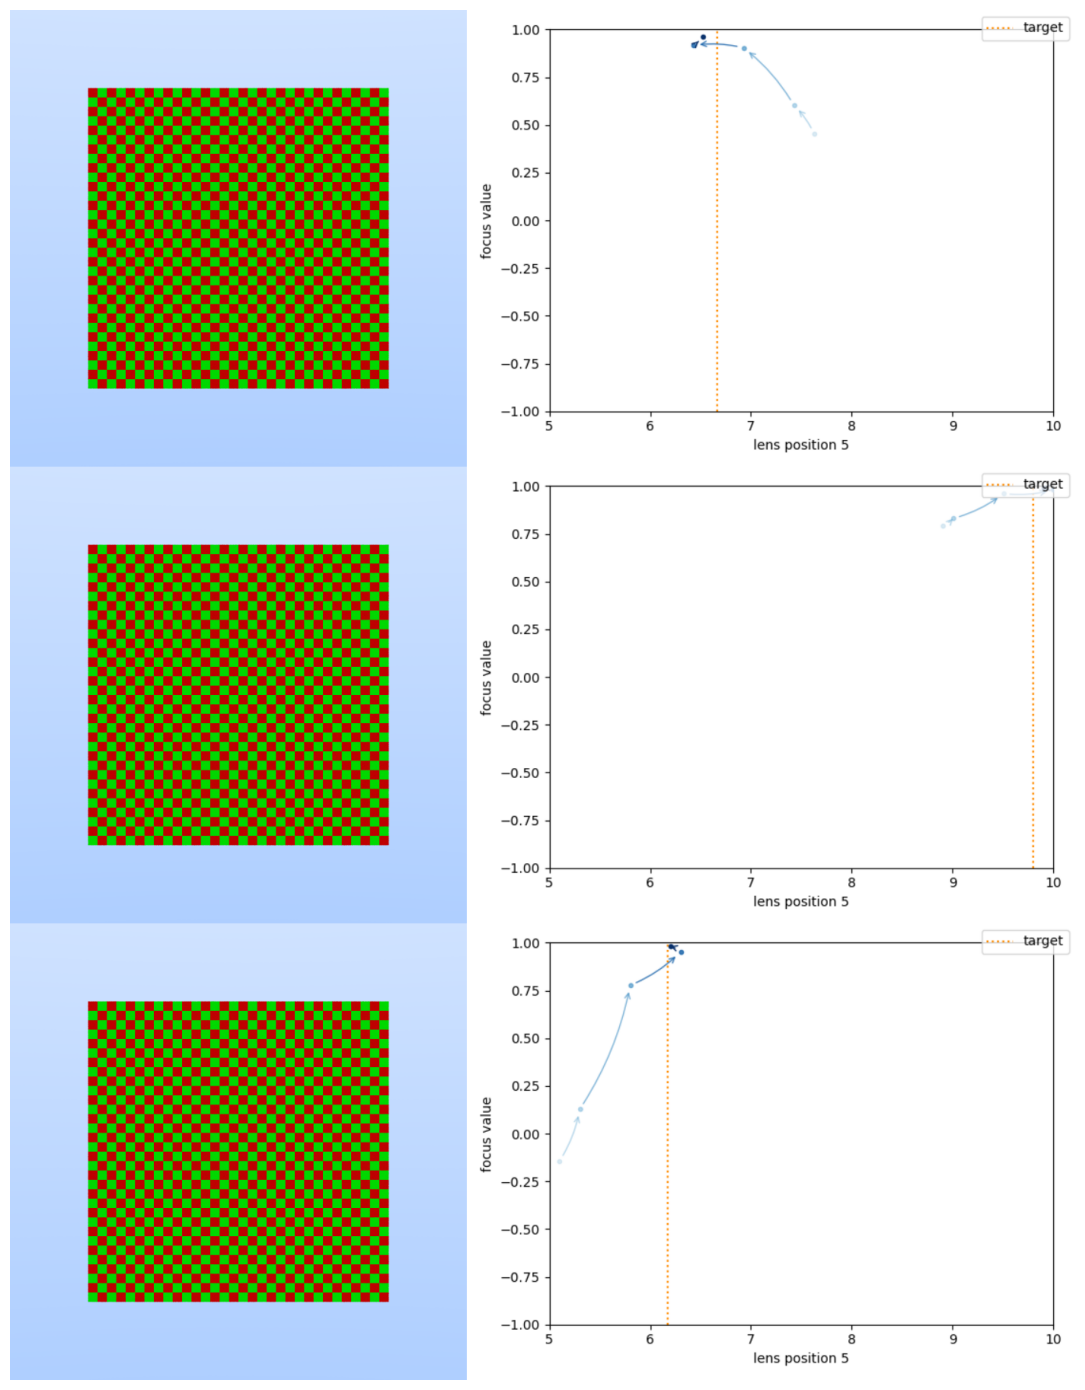

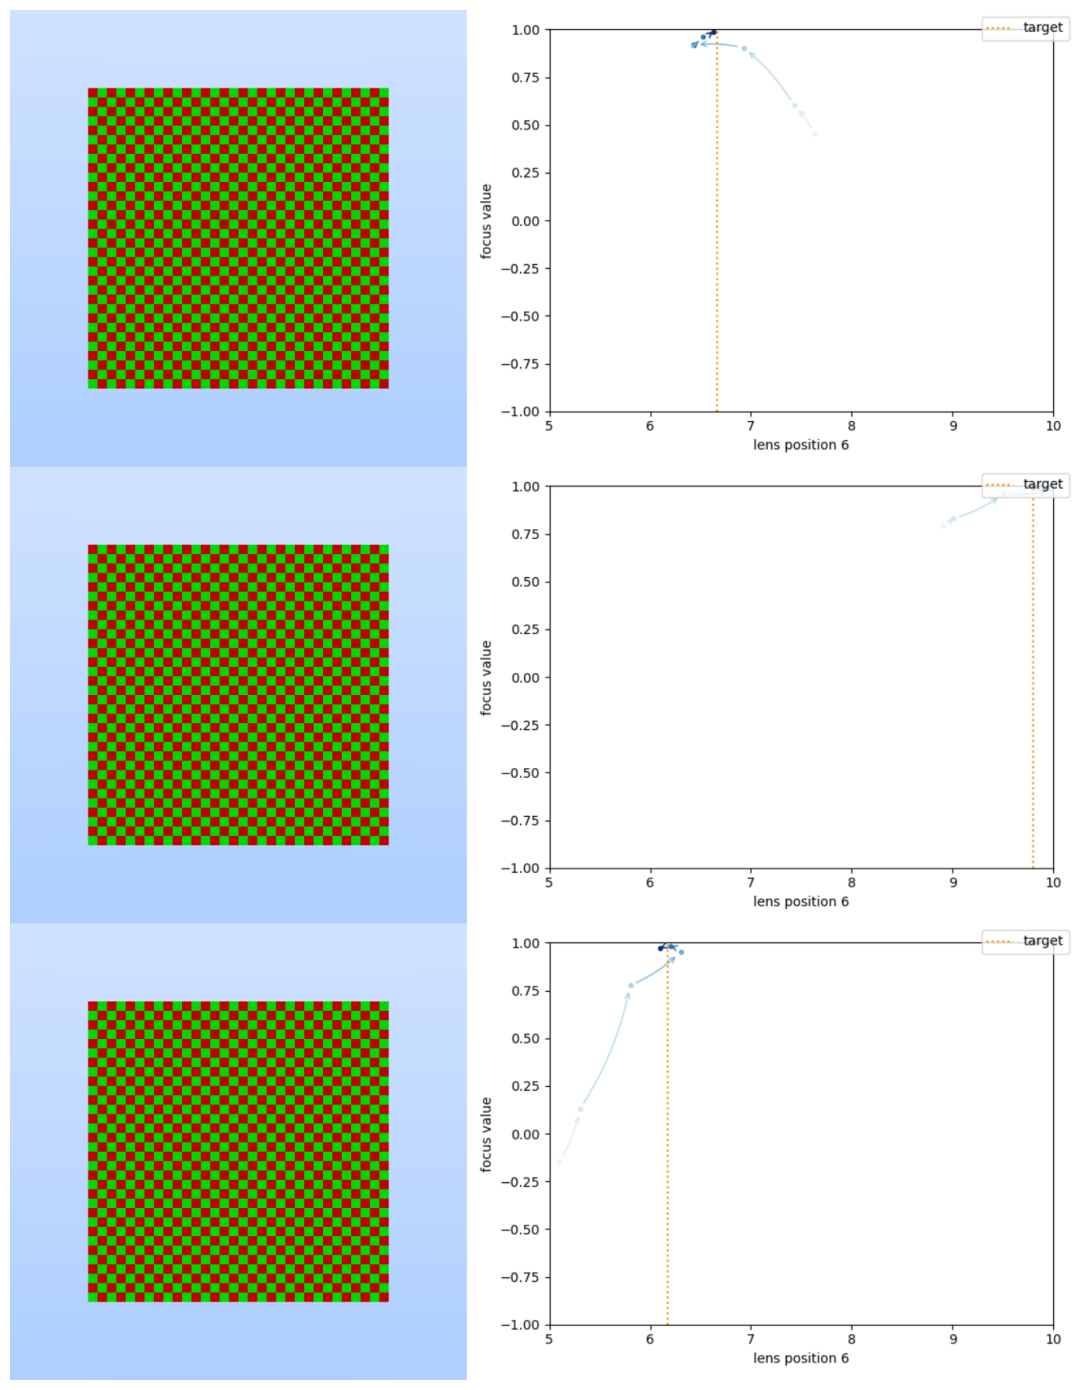

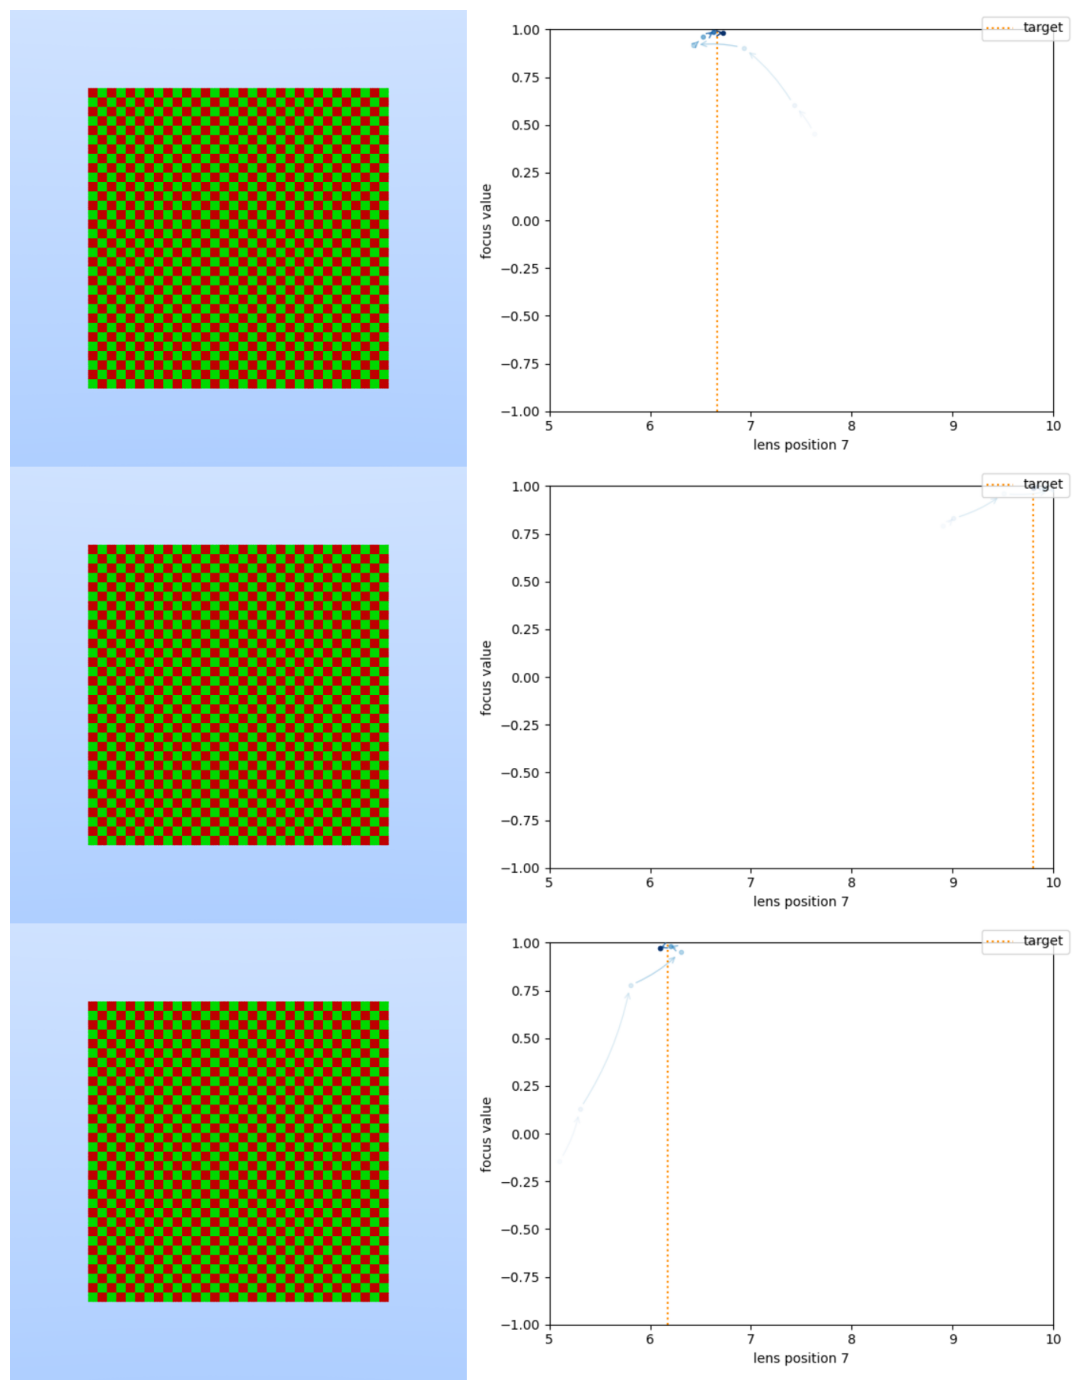

In [14]:
cross_target(4, 5, 6)